# indian_liver_patient Dataset analysing and predictions

In [1]:
#importing library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#looking up data
df = pd.read_csv("indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# Looking for missing values in the dataset
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
df.shape

(583, 11)

.

.

.

.

In [6]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [7]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
# Re-naming the columns
df.rename(columns={'Dataset':'Outcome'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Outcome                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})

.

In [10]:
# Having a look at the dataset after the numerical transformation
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [11]:
# Dropping the missing values
df = df.dropna()

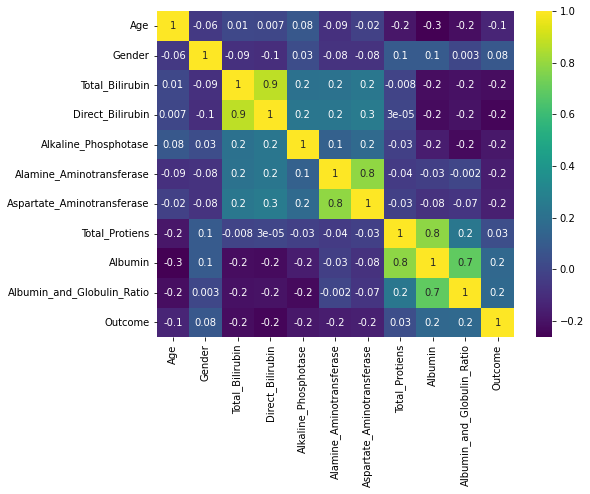

In [12]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis");

In [13]:
print ('Total Unhealthy Livers : {} '.format(df.Outcome.value_counts()[1]))
print ('Total Healthy Livers : {} '.format(df.Outcome.value_counts()[2]))

Total Unhealthy Livers : 414 
Total Healthy Livers : 165 


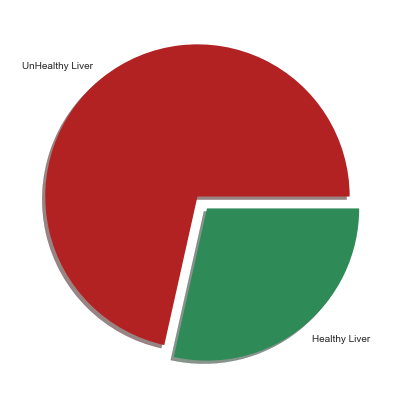

In [14]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))

plt.pie(x=df["Outcome"].value_counts(), 
        colors=["firebrick","seagreen"], 
        labels=["UnHealthy Liver","Healthy Liver"], 
        shadow = True, 
        explode = (0, 0.1)
        )

plt.show()

In [15]:
df.Gender.value_counts()

1    439
2    140
Name: Gender, dtype: int64

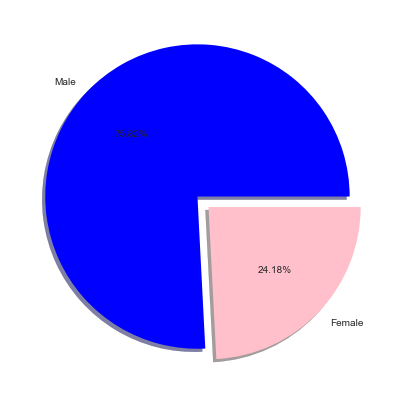

In [16]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))
plt.pie(x=df["Gender"].value_counts(), 
        colors=["blue","pink"], 
        labels=["Male","Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

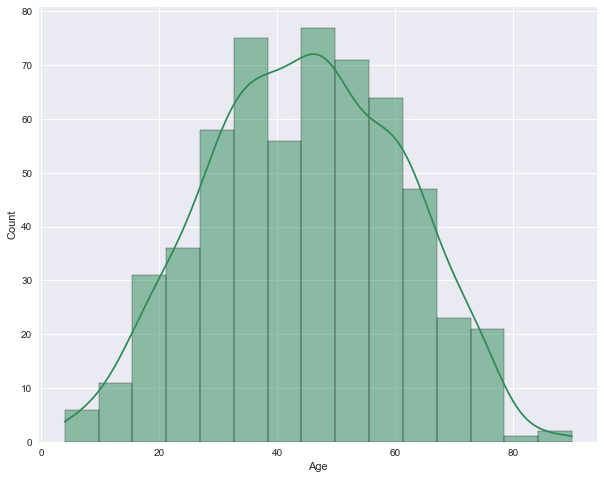

In [17]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(x=df["Age"], kde=True, color="seagreen");

In [18]:
#Splitting the data into training and test datasets
# y data
y = df["Outcome"]
# X data
X = df.drop("Outcome", axis=1)
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Outcome, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [21]:
len(X_train), len(X_test)

(405, 174)

In [22]:
# Scaling the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [24]:
LogisticRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression model: 64.9425287356322


In [25]:
# Having a look at the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

y_pred_lr = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


[[102  12]
 [ 49  11]]
              precision    recall  f1-score   support

           1       0.68      0.89      0.77       114
           2       0.48      0.18      0.27        60

    accuracy                           0.65       174
   macro avg       0.58      0.54      0.52       174
weighted avg       0.61      0.65      0.60       174



# K Neighbors Classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Text(0.5, 1.03, 'Confusion Matrix for K Neighbors Classifier')

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


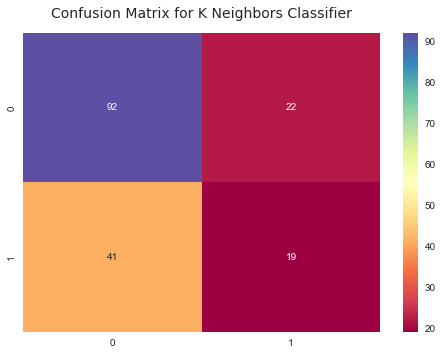

In [27]:
# Having a look at the confusion matrix
y_pred_knn = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, fontname="Helvetica", y=1.03)

In [28]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier model: 63.793103448275865


In [29]:
# Classification report of K Neighbors Classifier

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.69      0.81      0.74       114
           2       0.46      0.32      0.38        60

    accuracy                           0.64       174
   macro avg       0.58      0.56      0.56       174
weighted avg       0.61      0.64      0.62       174



# DecisionTreeClassifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
DecisionTreeClassifierScore = dtc.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier model: 64.9425287356322


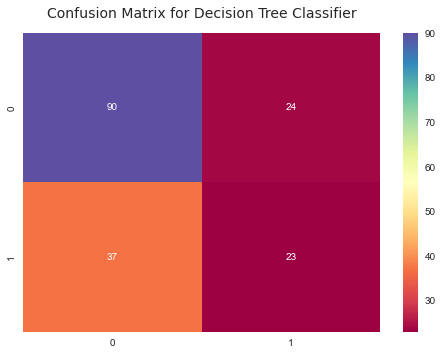

In [32]:
# Confusion matrix
y_pred_dtc = dtc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Decision Tree Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [33]:
# Classification Report of Decision Tree Classifier

print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           1       0.71      0.79      0.75       114
           2       0.49      0.38      0.43        60

    accuracy                           0.65       174
   macro avg       0.60      0.59      0.59       174
weighted avg       0.63      0.65      0.64       174



In [36]:
# predict a new data using logistic Regression

age=input("age:= ")
gender=input("gender:= ")
Tb=input("total bilirubin:= ")
db=input("Direct bilurubin:= ")
Aph=input("Alkaline_phosphate:= ")
AlAm=input("Alamine_Aminotransferase:= ")
AsAm=input("Aspartet_Aminotransferase:= ")
TP=input("Total_Protiens:= ")
Albu=input("Albumin:= ")
AlGlratio=input("Albumin and Globulin ratio:= ")
predict = lr.predict([[age,gender,Tb,db,Aph,AlAm,AsAm,TP,Albu,AlGlratio]])
predictkn = knn.predict([[age,gender,Tb,db,Aph,AlAm,AsAm,TP,Albu,AlGlratio]])
predictdt = dtc.predict([[age,gender,Tb,db,Aph,AlAm,AsAm,TP,Albu,AlGlratio]])
print("\noutcomes by lr: ",predict)
print("\noutcomes by knn: ",predictkn)
print("\noutcomes by dtc: ",predictdt)

age:= 20
gender:= 2
total bilirubin:= 0.7
Direct bilurubin:= 0.1
Alkaline_phosphate:= 187
Alamine_Aminotransferase:= 16
Aspartet_Aminotransferase:= 18
Total_Protiens:= 6.8
Albumin:= 3.3
Albumin and Globulin ratio:= 0.9

outcomes by lr:  [1]

outcomes by knn:  [1]

outcomes by dtc:  [1]


C:\Users\Vicky kumar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
C:\Users\Vicky kumar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
